In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import seaborn as sns

# Relative firefly luciferase activity of RBM12 (Figure 6c)

TtestResult(statistic=-13.411846407842598, pvalue=0.00017875989694656104, df=4.0)


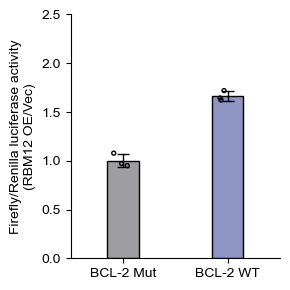

In [2]:
d = pd.read_excel("data/20250414_dual_luciferase.xlsx", index_col=0)

print(ttest_ind(d.values[0], d.values[1]))

np.random.seed(1)
xs = np.arange(len(d))
ys = d.mean(axis=1)
yerr = d.std(axis=1)
w = 0.3
colors = [(159/256,158/256,163/256), (143/256,149/256,197/256)]
plt.figure(figsize=(3, 3))
plt.bar(xs, ys, yerr=yerr, edgecolor="black", width=w, color=colors, capsize=4, error_kw={"lw": 1})
w1 = w * 0.6
for x in range(len(d)):
    for y in d.iloc[x]:
        x1 = x + (np.random.rand() - 0.5) * w1
        plt.scatter(x1, y, marker="o", s=8, color="none", edgecolor="black", lw=1, zorder=10)
plt.xlim(-0.5, 1.5)
plt.xticks(xs, ["BCL-2 Mut", "BCL-2 WT"])
plt.ylabel("Firefly/Renilla luciferase activity\n(RBM12 OE/Vec)")
plt.ylim(0, 2.5)
plt.yticks([0, 0.5, 1, 1.5, 2.0, 2.5])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/20250414_dual_luciferase.pdf")
plt.show()
plt.close()

# Enrichment of RBM12-interacting proteins (Figure 6d)

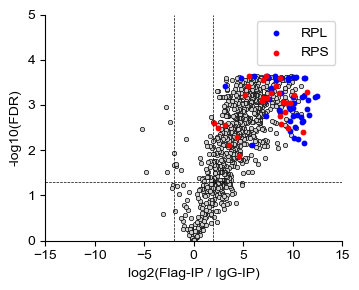

In [3]:
dat = pd.read_excel("data/20230413-MJ-RBM12-coIP-supplement.gene_name.xlsx", index_col=0)
xs = dat["Log2FC"] # log2FC
ys = -np.log10(dat["FDR"]) # p-value
s = 10

plt.figure(figsize=(3.7, 3))
plt.scatter(xs, ys, marker="o", s=s, edgecolor="black", lw=0.5, color="lightgrey")

if True:
    d1 = dat[[gname.startswith("RPL") for gname in dat.index]]
    d1 = d1[d1["FDR"] < 0.05]
    xs1 = d1["Log2FC"]
    ys1 = -np.log10(d1["FDR"])
    d2 = dat[[gname.startswith("RPS") for gname in dat.index]]
    d2 = d2[d2["FDR"] < 0.05]
    xs2 = d2["Log2FC"]
    ys2 = -np.log10(d2["FDR"])
    plt.scatter(xs1, ys1, marker="o", s=s, edgecolor="blue", color="blue", label="RPL")
    plt.scatter(xs2, ys2, marker="o", s=s, edgecolor="red", color="red", label="RPS")

plt.axhline(-np.log10(0.05), ls="--", color="black", lw=0.5)
for x in [-2, 2]:
    plt.axvline(x, ls="--", color="black", lw=0.5)
plt.xlabel("log2(Flag-IP / IgG-IP)")
plt.ylabel("-log10(FDR)")
plt.xlim(-15, 15)
plt.ylim(0, 5)
plt.xticks(np.arange(-15, 15 + 1, 5))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(markerscale=1, frameon=True)
plt.tight_layout()
plt.savefig("data/20230413-MJ-RBM12-coIP.scatter.pdf")
plt.show()
plt.close()

# Growth curve of cells (Figure 6f)

8.157691734290692e-06
0.001009872777910464
1.079027271402949e-05


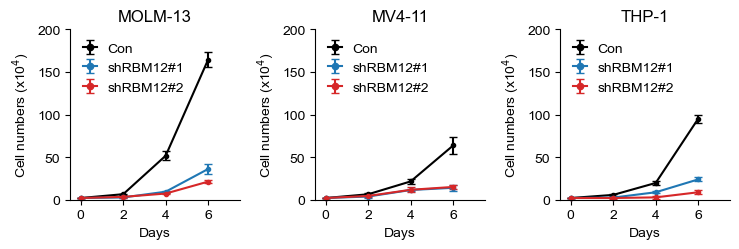

In [12]:
names = ["MOLM-13", "MV4-11", "THP-1"]
labels = ["Con", "shRBM12#1", "shRBM12#2"]
colors = ["black", "C0", "C3"]

fig, axs = plt.subplots(1, 3, figsize=(7.5, 2.6))

for i, name in enumerate(names):
    dat = pd.read_csv("data/AML/%s.growth_curve.csv" % name, index_col=0)
    
    m = dat.loc[6].values.reshape(3, 3)
    p = ttest_ind(m[0], m[2])[1]
    print(p)
    
    xs = dat.index
    plt.sca(axs[i])
    
    plt.title(name)
    
    for j in range(3):
        d = dat[dat.columns[j*3:(j+1)*3]]
        ys = d.mean(axis=1)
        yerr = d.std(axis=1)
        plt.errorbar(xs, ys, yerr=yerr, marker=".", color=colors[j], label=labels[j], capsize=3, clip_on=False)
        
    if False:
        x = 6.5
        vs = dat.loc[6]
        y1 = np.mean(vs[0:3])
        y2 = np.mean(vs[6:9])
        y3 = (y1 + y2) / 2
        plt.plot([x, x], [y1, y2], color="black", lw=1, clip_on=False)
        plt.plot([x - 0.1, x], [y1, y1], color="black", lw=1, clip_on=False)
        plt.plot([x - 0.1, x], [y2, y2], color="black", lw=1, clip_on=False)
        plt.text(x + 0.1, y2, "$\it{P}$ = %.1e" % p, rotation=-90, clip_on=False)
        
    plt.xlabel("Days")
    plt.ylabel("Cell numbers (x10$^4$)")
    plt.yticks(np.arange(0, 201, 50))
    plt.xlim(-0.5, 7.5)
    plt.xticks([0, 2, 4, 6])
    plt.ylim(0, 200)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.legend(frameon=False, bbox_to_anchor=(0, 1), loc="upper left", markerscale=1.5, handlelength=1)
plt.tight_layout()
plt.savefig("figures/growth_curve.pdf")
plt.show()
plt.close()

# Clone formation of cells (Figure 6g)

2.1356956190718085e-06
0.0002745616999934477
2.008906374054073e-06


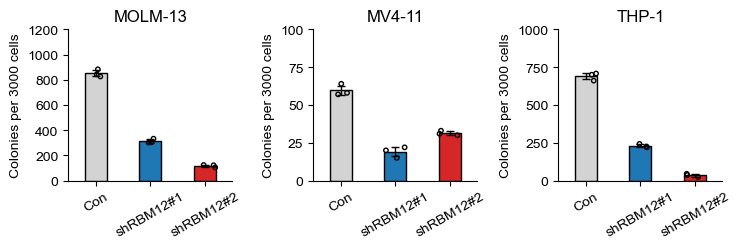

In [14]:
ylims = [1200, 100, 1000]
labels = ["Con", "shRBM12#1", "shRBM12#2"]
colors = ["lightgrey", "C0", "C3"]
np.random.seed(0)

fig, axs = plt.subplots(1, 3, figsize=(7.5, 2.6))
for i, name in enumerate(names):
    dat = pd.read_csv("data/AML/%s.clone_formation.csv" % name, index_col=0)
    m = np.array(dat.iloc[0]).reshape(3, 3)
    ys = np.mean(m, axis=1)
    yerr = np.std(m, axis=1)
    xs = np.arange(len(ys))
    p = ttest_ind(m[0], m[2])[1]
    print(p)
    ylim = ylims[i]
    
    plt.sca(axs[i])
    plt.title(name)
    plt.bar(xs, ys, yerr=yerr, edgecolor="black", color=colors, width=w, lw=1, error_kw={"capsize": 3, "lw": 1})
    if True:
        w = 0.4
        for x in xs:
            for y in m[x]:
                x1 = x + (np.random.rand() - 0.5) * w
                plt.scatter(x1, y, marker="o", s=10, color="none", edgecolor="black", zorder=10)
            
    if False:
        y = max(ys[0] + yerr[0], ys[2] + yerr[2]) + ylim * 0.1
        y1 = y - ylim * 0.02
        x1, x2 = 0, 2
        plt.plot([x1, x2], [y, y], color="black", lw=1)
        plt.plot([x1, x1], [y, y1], color="black", lw=1)
        plt.plot([x2, x2], [y, y1], color="black", lw=1)
        plt.text(1, y + ylim * 0.02, "$\it{P}$ = %.1e" % p, ha="center")
    
    plt.ylabel("Colonies per 3000 cells")
    
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, ylims[i])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks(xs, labels, rotation=30)
    if i == 0:
        plt.yticks(np.arange(0, 1200 + 1, 200))
    elif i == 1:
        plt.yticks(np.arange(0, 100 + 1, 25))
    elif i ==2:
        plt.yticks(np.arange(0, 1000 + 1, 250))
plt.tight_layout()
plt.savefig("figures/clone_formation.pdf", dpi=300)
plt.show()
plt.close()

# Enrichment of proteins via coupling co-IP experiments with quantitative proteomic analysis (Extended Data Figure 8b)

In [20]:
def get_gene_name(s):
    for item in s.split():
        if item.startswith("GN="):
            return item[3:]
    assert False
    
dat = pd.read_excel("data/20230413-MJ-RBM12-coIP-supplement.xlsx")
gnames = []
for detail in dat["Unnamed: 1"]:
    gnames.append(get_gene_name(detail))
dat.index = gnames
dat.index.name = "Gene"
dat = dat[dat.columns[2:10]]
dat.columns = ["Flag-R1", "Flag-R2", "Flag-R3", "IgG-R1", "IgG-R2", "IgG-R3", "Log2FC", "Pvalue"]
dat["Pvalue"] = 10 ** -dat["Pvalue"]
rejected, corrected_p_values, _, _ = multipletests(dat["Pvalue"], alpha=0.05, method='fdr_bh')
dat["FDR"] = corrected_p_values
dat.sort_values(by="FDR")
dat.to_excel("results/20230413-MJ-RBM12-coIP-supplement.gene_name.xlsx")

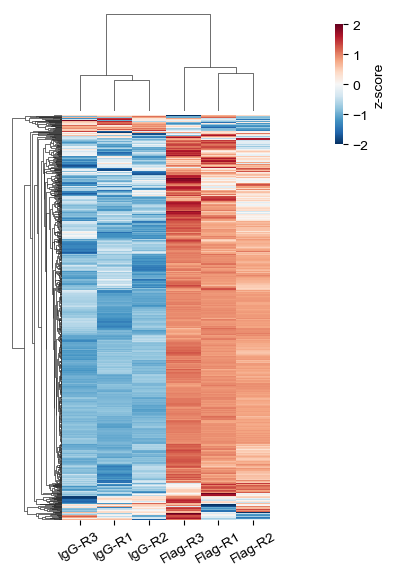

In [22]:
dat = pd.read_excel("results/20230413-MJ-RBM12-coIP-supplement.gene_name.xlsx", index_col=0)
m = dat[dat.columns[:6]]
gnames = ["EIF4A1", "IGF2BP1", "RBM12", "EIF4E2", "ALYREF"]
ret = sns.clustermap(m, z_score=0, cmap="RdBu_r", vmin=-2, vmax=2,
                         col_cluster=True, row_cluster=True, figsize=(4, 6), 
                         cbar_pos=(0.85, .75, .02, .2))
gnames1 = list(ret.data2d.index)
ys = [gnames1.index(gname) for gname in gnames]
ax = ret.cax
plt.sca(ax)
plt.ylabel("z-score")
ax = ret.ax_heatmap
plt.sca(ax)
plt.yticks([])
plt.ylabel(None)
plt.xticks(rotation=30)
ret.fig.savefig("figures/20230413-MJ-RBM12-coIP.pdf", dpi=300)

# GO terms (Extended Data Figure 8c)

In [23]:
dat = pd.read_excel("data/top200_Go Term.xlsx", header=1, index_col=0)
show_list = [
    "cytoplasmic translation (GO:0002181)",
    "ribosome assembly (GO:0042255)",
    "translation (GO:0006412)",
    "translational initiation (GO:0006413)",
    "regulation of translation (GO:0006417)",
]
dat = dat.loc[show_list]
dat = dat.sort_values(by="upload_1 (FDR)")

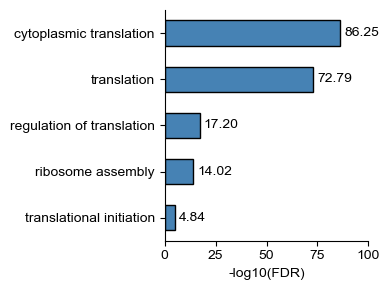

In [24]:
xs = -np.log10(dat["upload_1 (FDR)"])
ys = np.arange(len(xs))[::-1]
ticks = [s[:-13] for s in dat.index]
h = 0.55
plt.figure(figsize=(4, 3))
plt.barh(ys, xs, height=h, color="steelblue", edgecolor="black")
for x, y in zip(xs, ys):
    plt.text(x + 2, y, "%.2f" % x, ha="left", va="center", clip_on=False)
plt.xlim(0, 100)
plt.ylim(min(ys) - 0.5, max(ys) + 0.5)
plt.yticks(ys, ticks)
plt.xlabel("-log10(FDR)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/go_term.pdf", dpi=300)

# Correlation between RBM12 and BCL2 (Extended Data Figure 9g)

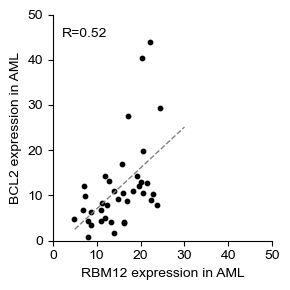

In [16]:
dat = pd.read_csv("data/AML/correlation_of_RBM12_and_BCL2.csv")
xs = dat["RBM12"]
ys = dat["BCL2"]
a, b = np.polyfit(xs, ys, 1)
r = np.corrcoef(xs, ys)[0][1]

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, color="black", s=10)
xs1 = [5, 30]
plt.plot(xs1, [a * x + b for x in xs1], color="grey", ls="--", lw=1)
plt.text(2, 45, "R=%.2f" % r)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("RBM12 expression in AML")
plt.ylabel("BCL2 expression in AML")
plt.tight_layout()
plt.savefig("figures/correlation.pdf", dpi=300)
plt.show()
plt.close()

# qPCR of RBM12 mRNA level (Extended Data Figure 9c)

--------------------------------------------------------------------------------
MOLM-13
P-value of 1 vs 2: 0.3148400941371565
P-value of 1 vs 3: 0.00011203085905933166
P-value of 2 vs 3: 1.1008983070586946e-05


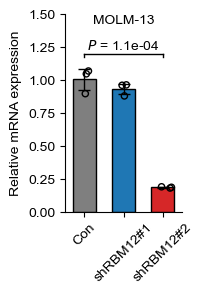

--------------------------------------------------------------------------------
MV4-11
P-value of 1 vs 2: 0.0004823050934802615
P-value of 1 vs 3: 2.3555442821972562e-06
P-value of 2 vs 3: 1.2377103995898553e-06


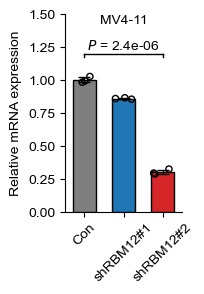

--------------------------------------------------------------------------------
THP-1
P-value of 1 vs 2: 0.0001423853715872745
P-value of 1 vs 3: 1.7445859792100606e-06
P-value of 2 vs 3: 3.62576700862613e-05


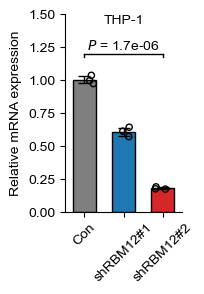

In [17]:
np.random.seed(0)
names = ["MOLM-13", "MV4-11", "THP-1"]
labels = ["Con", "shRBM12#1", "shRBM12#2"]
colors = ["C7", "C0", "C3"]
w = 0.6

for name in names:
    print("-" * 80)
    print(name)
    
    d = pd.read_csv("data/qPCR/%s.csv" % name)
    m = d.iloc[0][1:].values.reshape(3, 3)
    
    p1 = ttest_ind(m[0], m[1])[1]
    p2 = ttest_ind(m[0], m[2])[1]
    p3 = ttest_ind(m[1], m[2])[1]
    print("P-value of 1 vs 2:", p1)
    print("P-value of 1 vs 3:", p2)
    print("P-value of 2 vs 3:", p3)
    
    xs = np.arange(3)
    ys = np.mean(m, axis=1)
    stds = np.std(m, axis=1)
    
    ylim = 1.5
    
    plt.figure(figsize=(2, 3))
    # plt.title(name)
    plt.bar(xs, ys, yerr=stds, width=w, color=colors, edgecolor="black", error_kw={"capsize": 4, "lw": 1})
    
    plt.text(1, ylim * 0.95, name, ha="center")
    
    y1 = 1.2
    y2 = y1 - ylim * 0.02
    plt.plot([0, 2], [y1, y1], color="black", lw=1)
    plt.plot([0, 0], [y1, y2], color="black", lw=1)
    plt.plot([2, 2], [y1, y2], color="black", lw=1)
    plt.text(1, y1 + ylim * 0.02, "$\it{P}$ = %.1e" % p2, ha="center")
    
    for x in range(len(m)):
        for y in m[x]:
            x1 = x + (np.random.rand() - 0.5) * w * 0.8
            plt.scatter(x1, y, marker="o", s=20, color="none", edgecolor="black", lw=1, zorder=10)
    
    plt.xticks(xs, labels, rotation=45)
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, ylim)
    plt.ylabel("Relative mRNA expression")
    
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("figures/qPCR.%s.pdf" % name, dpi=300)
    plt.show()
    plt.close()